In [191]:
# Python
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

In [192]:
# SOURCE_FILE='stocks_data/AAPL.csv'
# SOURCE_FILE='stocks_data/AMZN.csv'
# SOURCE_FILE='stocks_data/GOOG.csv'
# SOURCE_FILE='stocks_data/META.csv'
# SOURCE_FILE='stocks_data/NFLX.csv'
SOURCE_FILE='stocks_data/TSLA.csv'

In [193]:
# Python

try: 
    dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
    df = pd.read_csv(SOURCE_FILE,sep=',', parse_dates=['Date'], date_parser=dateparse).fillna(0)
except:
    dateparse = lambda dates: pd.datetime.strptime(dates, '%m/%d/%Y')
    df = pd.read_csv(SOURCE_FILE,sep=',', parse_dates=['Date'], date_parser=dateparse).fillna(0)
df = df[['Date', 'Close']]
df = df.rename(columns={"Date":"ds", "Close":"y"})
df.head()

/var/folders/40/6q5tp5n97sj2530mp2sq3m9c0000gn/T/ipykernel_19522/2524197242.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')


,ds,y
0,2018-10-15,17.306000
1,2018-10-16,18.439333
2,2018-10-17,18.118668
3,2018-10-18,17.594000
4,2018-10-19,17.333332


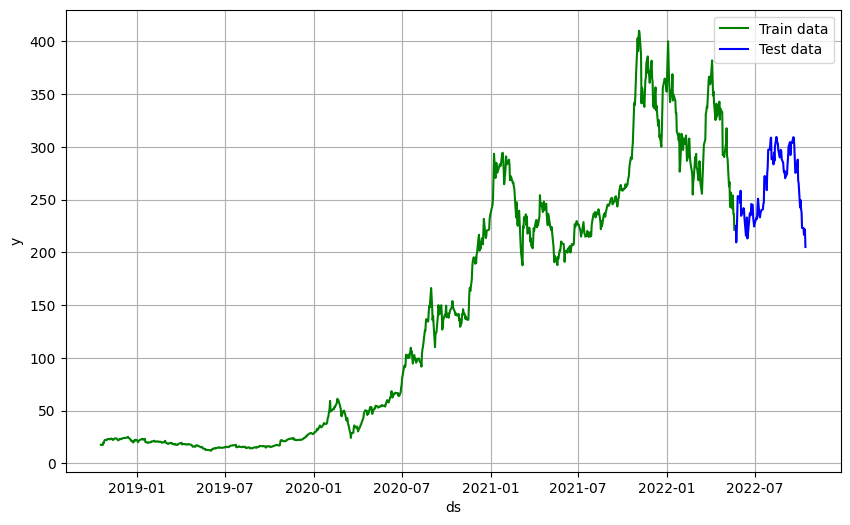

In [194]:
train_data, test_data = df[3:int(len(df)*0.90)], df[int(len(df)*0.90):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('ds')
plt.ylabel('y')
plt.plot(train_data['ds'], train_data['y'], 'green', label='Train data')
plt.plot(test_data['ds'], test_data['y'], 'blue', label='Test data')
plt.legend()

In [195]:
# Python
m = Prophet(daily_seasonality = True)
m.fit(train_data)

11:12:20 - cmdstanpy - INFO - Chain [1] start processing
11:12:21 - cmdstanpy - INFO - Chain [1] done processing


In [196]:
# Python
future = m.make_future_dataframe(periods=len(test_data.index))
future.tail()

,ds
1000,2022-08-25
1001,2022-08-26
1002,2022-08-27
1003,2022-08-28
1004,2022-08-29


In [197]:
# Python
fc = m.predict(future)
fc[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2018-10-18,-8.623517,-37.264683,17.917992
1,2018-10-19,-6.812959,-33.866512,21.241396
2,2018-10-22,0.934190,-27.707890,27.136953
3,2018-10-23,2.845242,-24.706432,30.379229
4,2018-10-24,4.687417,-22.165918,32.005706
...,...,...,...,...
1000,2022-08-25,340.279309,310.987166,367.673616
1001,2022-08-26,340.259944,310.595564,370.343136
1002,2022-08-27,345.844258,315.135532,376.370806
1003,2022-08-28,346.182807,317.096381,373.182420


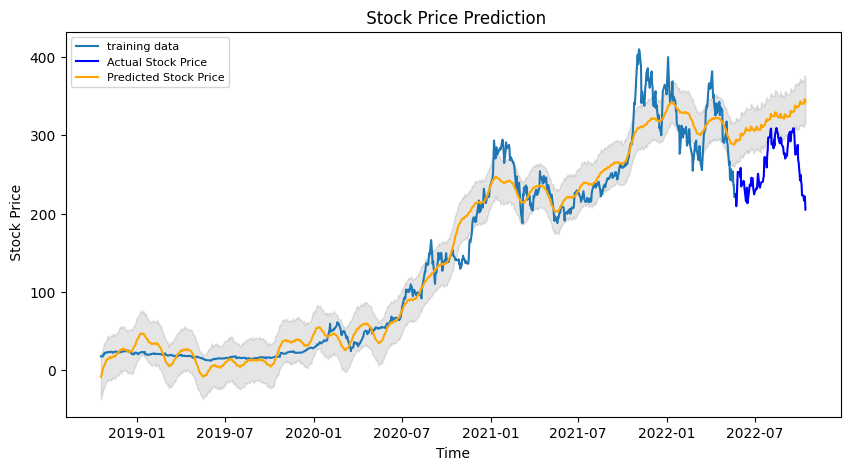

In [198]:
fc_series = pd.Series(fc['yhat'].to_numpy())
lower_series = pd.Series(fc['yhat_lower'].to_numpy())
upper_series = pd.Series(fc['yhat_upper'].to_numpy())
# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data['ds'], train_data['y'], label='training data')
plt.plot(test_data['ds'], test_data['y'], color = 'blue', label='Actual Stock Price')
plt.plot(df['ds'].iloc[3:],fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(df['ds'].iloc[3:], lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()